In [10]:
import numpy as np 
import pandas as pd

---

In [11]:
df = pd.read_csv(r'C:\Users\eslam\OneDrive\Desktop\SDS\Projects\1- Retail Pulse\Data\20250419 TechCornerSales\1. Original Data\TechCorner_Sales_update.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cus.ID                                8871 non-null   int64  
 1   Date                                  8871 non-null   object 
 2   Cus. Location                         8871 non-null   object 
 3   Age                                   8871 non-null   int64  
 4   Gender                                8871 non-null   object 
 5   Mobile Name                           8871 non-null   object 
 6   Sell Price                            8871 non-null   float64
 7   Does he/she Come from Facebook Page?  8871 non-null   object 
 8   Does he/she Followed Our Page?        8871 non-null   object 
 9   Did he/she buy any mobile before?     8871 non-null   object 
 10  Did he/she hear of our shop before?   8871 non-null   object 
dtypes: float64(1), in

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


---

Data Quality Checklist

1- Completeness (No Missing Values)                                 CHECKED
2- Uniqueness (No Duplicates)                                       CHECKED
3- Consistency (No Conflict between data info)                      
4- Accuracy                                                         
5- Validity                                                         
6- Timeliness

---

In [12]:
#---Check For Missing Values

df_shape = df.shape
rows_no = df_shape[0]
columns_no = df_shape[1]
print(f"Number of rows: {rows_no}\nNumber of columns: {columns_no}\n")

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}\n")

# Check for null values percentage in the DataFrame
missing_values_percentage = (missing_values.sum() / rows_no * columns_no) * 100
print(f"Missing values %:\n{missing_values_percentage}\n")

Number of rows: 8871
Number of columns: 11

Missing values in each column:
Cus.ID                                  0
Date                                    0
Cus. Location                           0
Age                                     0
Gender                                  0
Mobile Name                             0
Sell Price                              0
Does he/she Come from Facebook Page?    0
Does he/she Followed Our Page?          0
Did he/she buy any mobile before?       0
Did he/she hear of our shop before?     0
dtype: int64

Missing values %:
0.0



---

In [13]:
#---Check Duplicates
print(f"Number of duplicated Customers: {df.duplicated(subset='Cus.ID').sum()}")
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated Customers: 0
Number of duplicated rows: 0


---

In [ ]:
cx_geo = df.groupby('Cus. Location')['Cus. Location'].count()
print(f"Number of Customers in each location:\n{cx_geo}\n")

non_local_cx = cx_geo['Outside Rangamati']
local_cx = cx_geo.sum() - non_local_cx
print(f"Number of Local Customers: {local_cx}")
print(f"Number of Non-Local Customers: {non_local_cx}\n")

brands = df.groupby('Mobile Name')['Mobile Name'].count()
print('brands:\n', brands)

Number of Customers in each location:
Cus. Location
Inside Rangamati     2899
Outside Rangamati    3000
Rangamati Sadar      2972
Name: Cus. Location, dtype: int64

Number of Local Customers: 5871
Number of Non-Local Customers: 3000

brands:
 Mobile Name
Galaxy A55 5G 8/128         522
Galaxy M35 5G 8/128         528
Galaxy S24 Ultra 12/256     541
Moto G85 5G 8/128           560
Narzo N53 4/64              530
Note 11S 6/128              538
Note 14 Pro 5G 8/256        495
Pixel 7a 8/128              518
Pixel 8 Pro 12/256          533
R-70 Turbo 5G 6/128         511
Redmi Note 12 Pro 8/128     528
Vivo T3x 5G 8/128           514
Vivo Y200 5G 6/128          520
iPhone 16 Pro 256GB         521
iPhone 16 Pro Max 1TB       488
iQOO Neo 9 Pro 5G 12/256    502
iQOO Z7 5G 6/128            522
Name: Mobile Name, dtype: int64


---

In [ ]:
# ---Validate Data Types, Convert Data Types & Clean Data
df.drop(columns=['Cus.ID'], inplace=True)                                       # Drop the 'Cus.ID' column
df.columns = df.columns.str.replace(' ', '')                                    # Remove spaces from column names
df.columns = df.columns.str.replace('.', '')                                    # Remove dots from column names
df = df.sort_values(by='CusLocation', ascending=True)                           # Sort by 'CusLocation' column
df.reset_index(drop=True, inplace=True)                                         # Reset the index after sorting
df['Date'] = pd.to_datetime(df['Date'], format='mixed', yearfirst=True)         # Convert 'Date' column to datetime format

---

Number of outliers in 'Age' column: 0
Outliers in 'Age' column:
Empty DataFrame
Columns: [Date, Age, MobileName, SellPrice]
Index: []



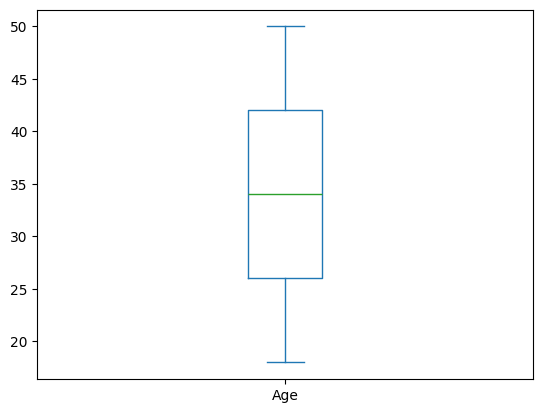

In [39]:
#---Check for Age Outliers

df['Age'].describe()  # Get descriptive statistics for 'Age' column
df['Age'].plot.box()  # Boxplot for 'Age' column
# Check for outliers in the 'Age' column using IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_age = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Number of outliers in 'Age' column: {len(outliers_age)}")
print(f"Outliers in 'Age' column:\n{outliers_age[['Date', 'Age', 'MobileName', 'SellPrice']]}\n")

---

Number of outliers in 'SellPrice' column: 919
Outliers in 'SellPrice' column:
           Date  Age                MobileName  SellPrice
0    2024-04-10   24        Pixel 8 Pro 12/256    55076.0
3    2024-07-08   32       iPhone 16 Pro 256GB    67391.0
8    2024-11-15   29       iPhone 16 Pro 256GB    65626.0
9    2024-07-08   27            Pixel 7a 8/128    44139.0
14   2024-11-15   36   Galaxy S24 Ultra 12/256    50597.0
...         ...  ...                       ...        ...
8839 2024-12-25   31     iPhone 16 Pro Max 1TB   199835.0
8855 2024-12-23   46  iQOO Neo 9 Pro 5G 12/256    40817.0
8860 2024-12-24   32       Galaxy A55 5G 8/128    39073.0
8861 2024-08-23   35     iPhone 16 Pro Max 1TB    41770.0
8862 2024-12-24   18  iQOO Neo 9 Pro 5G 12/256    40483.0

[919 rows x 4 columns]



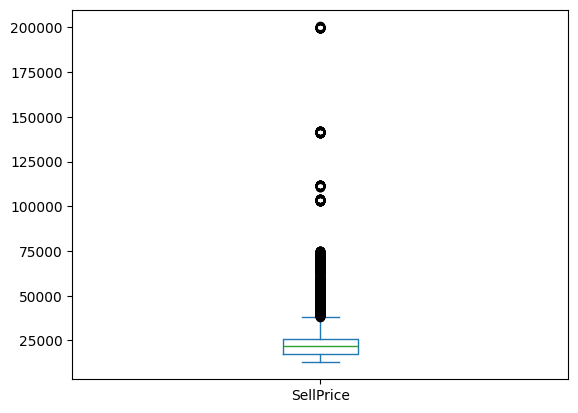

In [43]:
#---Check for Sell Price Outliers

df['SellPrice'].describe()  # Get descriptive statistics for 'Age' column
df['SellPrice'].plot.box()  # Boxplot for 'Age' column
# Check for outliers in the 'Age' column using IQR method
Q1 = df['SellPrice'].quantile(0.25)
Q3 = df['SellPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_sell_price = df[(df['SellPrice'] < lower_bound) | (df['SellPrice'] > upper_bound)]
print(f"Number of outliers in 'SellPrice' column: {len(outliers_sell_price)}")
print(f"Outliers in 'SellPrice' column:\n{outliers_sell_price[['Date', 'Age', 'MobileName', 'SellPrice']]}\n")

---

In [ ]:
# Save outliers to CSV files
outliers_sell_price.sort_values(by=['MobileName'], inplace=True)  # Sort by 'MobileName' column
outliers_sell_price.to_csv(r'C:\Users\eslam\OneDrive\Desktop\SDS\Projects\1- Retail Pulse\SDS-CP026-retail-pulse\submissions\team\eslam-mahmoud\data\analysis\TechCorner_Sales_SellPrice_Outliers.csv', index=True)

C:\Users\eslam\AppData\Local\Temp\ipykernel_2448\490961153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sell_price.sort_values(by=['MobileName'], inplace=True)  # Sort by 'MobileName' column


---

In [50]:
# Find Average Sell Price for each Mobile Name
avg_sell_price = df.groupby('MobileName')['SellPrice'].mean().reset_index()
avg_sell_price.rename(columns={'SellPrice': 'AvgSellPrice'}, inplace=True)  # Rename the column for clarity

# Save brands average price to CSV files
avg_sell_price.sort_values(by=['MobileName'], inplace=True)  # Sort by 'MobileName' column
avg_sell_price.to_csv(r'C:\Users\eslam\OneDrive\Desktop\SDS\Projects\1- Retail Pulse\SDS-CP026-retail-pulse\submissions\team\eslam-mahmoud\data\analysis\Brands_Average_Price.csv', index=True)

---

In [ ]:
#--- Drop Data With Sell Price Outliers
df_no_outliers = df[~df['SellPrice'].isin(outliers_sell_price['SellPrice'])]  # Drop rows with outliers in 'SellPrice' column
df_no_outliers.info()

# 8871 - 919 = 7952 VERIFIED

<class 'pandas.core.frame.DataFrame'>
Index: 7952 entries, 1 to 8870
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             7952 non-null   datetime64[ns]
 1   CusLocation                      7952 non-null   object        
 2   Age                              7952 non-null   int64         
 3   Gender                           7952 non-null   object        
 4   MobileName                       7952 non-null   object        
 5   SellPrice                        7952 non-null   float64       
 6   Doeshe/sheComefromFacebookPage?  7952 non-null   object        
 7   Doeshe/sheFollowedOurPage?       7952 non-null   object        
 8   Didhe/shebuyanymobilebefore?     7952 non-null   object        
 9   Didhe/shehearofourshopbefore?    7952 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usag

In [ ]:
# Encoding Original DataFrame
df.head(10)
df.dtypes
df_encoded = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_encoded = pd.get_dummies(df_encoded, drop_first=True, dtype=int)  # One-hot encode categorical variables

df_encoded.columns  # Check the columns after encoding
df_encoded.rename(columns=lambda x: x.replace(' ', ''), inplace=True)  # Remove spaces from column names
df_encoded.rename(columns=lambda x: x.replace('CusLocation_', ''), inplace=True)
df_encoded.rename(columns=lambda x: x.replace('MobileName_', ''), inplace=True)
df_encoded.rename(columns={'Gender_M':'Male',
                        'Doeshe/sheComefromFacebookPage?_Yes': 'FromFacebookPage',
                        'Doeshe/sheFollowedOurPage?_Yes': 'Follower',
                        'Didhe/shebuyanymobilebefore?_Yes': 'PreviousPurchase',
                        'Didhe/shehearofourshopbefore?_Yes': 'HeardOfShopBefore',}, inplace=True)  # Rename columns for clarity


,Date,Age,SellPrice,OutsideRangamati,RangamatiSadar,Male,GalaxyM355G8/128,GalaxyS24Ultra12/256,MotoG855G8/128,NarzoN534/64,...,VivoT3x5G8/128,VivoY2005G6/128,iPhone16Pro256GB,iPhone16ProMax1TB,iQOONeo9Pro5G12/256,iQOOZ75G6/128,FromFacebookPage,Follower,PreviousPurchase,HeardOfShopBefore
0,2024-04-10,24,55076.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2025-11-01,39,18399.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2025-11-01,37,26097.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2024-07-08,32,67391.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2025-11-01,19,26847.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2024-11-14,30,22531.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,2025-10-01,41,23633.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,2024-11-14,25,15904.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
8,2024-11-15,29,65626.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,2024-07-08,27,44139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


---

In [27]:
df_encoded.sort_values(by='Date', ascending=True, inplace=True)  # Sort by 'Date' column
df_encoded.reset_index(drop=True, inplace=True)  # Reset the index after sorting
df_encoded.info()       # Check the data types of the encoded DataFrame

df_encoded.to_csv(r'C:\Users\eslam\OneDrive\Desktop\SDS\Projects\1- Retail Pulse\SDS-CP026-retail-pulse\submissions\team\eslam-mahmoud\data\processed\TechCorner_Sales_Encoded.csv', index=False)   # Save the encoded DataFrame to a CSV file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8871 non-null   datetime64[ns]
 1   Age                   8871 non-null   int64         
 2   SellPrice             8871 non-null   float64       
 3   OutsideRangamati      8871 non-null   int64         
 4   RangamatiSadar        8871 non-null   int64         
 5   Male                  8871 non-null   int64         
 6   GalaxyM355G8/128      8871 non-null   int64         
 7   GalaxyS24Ultra12/256  8871 non-null   int64         
 8   MotoG855G8/128        8871 non-null   int64         
 9   NarzoN534/64          8871 non-null   int64         
 10  Note11S6/128          8871 non-null   int64         
 11  Note14Pro5G8/256      8871 non-null   int64         
 12  Pixel7a8/128          8871 non-null   int64         
 13  Pixel8Pro12/256   

---

In [44]:
#Encoding the no outliers DataFrame
df_no_outliers_encoded = df_no_outliers.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_no_outliers_encoded = pd.get_dummies(df_no_outliers_encoded, drop_first=True, dtype=int)  # One-hot encode categorical variables

df_no_outliers_encoded.rename(columns=lambda x: x.replace(' ', ''), inplace=True)  # Remove spaces from column names
df_no_outliers_encoded.rename(columns=lambda x: x.replace('CusLocation_', ''), inplace=True)
df_no_outliers_encoded.rename(columns=lambda x: x.replace('MobileName_', ''), inplace=True)
df_no_outliers_encoded.rename(columns={'Gender_M':'Male',
                        'Doeshe/sheComefromFacebookPage?_Yes': 'FromFacebookPage',
                        'Doeshe/sheFollowedOurPage?_Yes': 'Follower',
                        'Didhe/shebuyanymobilebefore?_Yes': 'PreviousPurchase',
                        'Didhe/shehearofourshopbefore?_Yes': 'HeardOfShopBefore',}, inplace=True)  # Rename columns for clarity

---

In [45]:
df_no_outliers_encoded.sort_values(by='Date', ascending=True, inplace=True)  # Sort by 'Date' column
df_no_outliers_encoded.reset_index(drop=True, inplace=True)  # Reset the index after sorting
df_no_outliers_encoded.info()       # Check the data types of the encoded DataFrame

df_no_outliers_encoded.to_csv(r'C:\Users\eslam\OneDrive\Desktop\SDS\Projects\1- Retail Pulse\SDS-CP026-retail-pulse\submissions\team\eslam-mahmoud\data\processed\TechCorner_Sales_Outliers_Removed_Encoded.csv', index=False)   # Save the encoded DataFrame to a CSV file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  7952 non-null   datetime64[ns]
 1   Age                   7952 non-null   int64         
 2   SellPrice             7952 non-null   float64       
 3   OutsideRangamati      7952 non-null   int64         
 4   RangamatiSadar        7952 non-null   int64         
 5   Male                  7952 non-null   int64         
 6   GalaxyM355G8/128      7952 non-null   int64         
 7   GalaxyS24Ultra12/256  7952 non-null   int64         
 8   MotoG855G8/128        7952 non-null   int64         
 9   NarzoN534/64          7952 non-null   int64         
 10  Note11S6/128          7952 non-null   int64         
 11  Note14Pro5G8/256      7952 non-null   int64         
 12  Pixel7a8/128          7952 non-null   int64         
 13  Pixel8Pro12/256   